ANALISIS EXPLORATORIO DE DATOS - MODULO 3

AUTOR: BRYAN MARQUINA

DATASET: https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents/data

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/traffic-accidents")

file = '/traffic_accidents.csv'

path_file = path + file

print("Path to dataset files:", path_file)

Path to dataset files: /root/.cache/kagglehub/datasets/oktayrdeki/traffic-accidents/versions/1/traffic_accidents.csv


In [ ]:
!ls /root/.cache/kagglehub/datasets/oktayrdeki/traffic-accidents/versions/1/

traffic_accidents.csv


#IMPORTACIÓN DE LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# APARIENCIA DE GRAFICOS

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

## CARGA DE DATASET

In [ ]:
traffic_accidents_df = pd.read_csv(path_file)
traffic_accidents_df.head(2)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8


## 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

# 1.1 TIPOS DE DATOS Y CANTIDAD DE REGISTROS Y VARIABLES

In [ ]:
traffic_accidents_df.dtypes

,0
crash_date,object
traffic_control_device,object
weather_condition,object
lighting_condition,object
first_crash_type,object
trafficway_type,object
alignment,object
roadway_surface_cond,object
road_defect,object
crash_type,object


In [ ]:
traffic_accidents_df.dtypes.value_counts()

,count
object,14
float64,6
int64,4


In [ ]:
traffic_accidents_df.shape

(209306, 24)

# 1.2 ANALISIS DE VALORES NULOS

In [ ]:
traffic_accidents_df.isnull().any()

,0
crash_date,False
traffic_control_device,False
weather_condition,False
lighting_condition,False
first_crash_type,False
trafficway_type,False
alignment,False
roadway_surface_cond,False
road_defect,False
crash_type,False


In [ ]:
traffic_accidents_df.isnull().sum().sort_values(ascending=False)

,0
crash_date,0
traffic_control_device,0
crash_day_of_week,0
crash_hour,0
injuries_no_indication,0
injuries_reported_not_evident,0
injuries_non_incapacitating,0
injuries_incapacitating,0
injuries_fatal,0
injuries_total,0


In [ ]:
plot_null_traffic_accidents = traffic_accidents_df.isnull().melt(value_name='missing')
plot_null_traffic_accidents

,variable,missing
0,crash_date,False
1,crash_date,False
2,crash_date,False
3,crash_date,False
4,crash_date,False
...,...,...
5023339,crash_month,False
5023340,crash_month,False
5023341,crash_month,False
5023342,crash_month,False


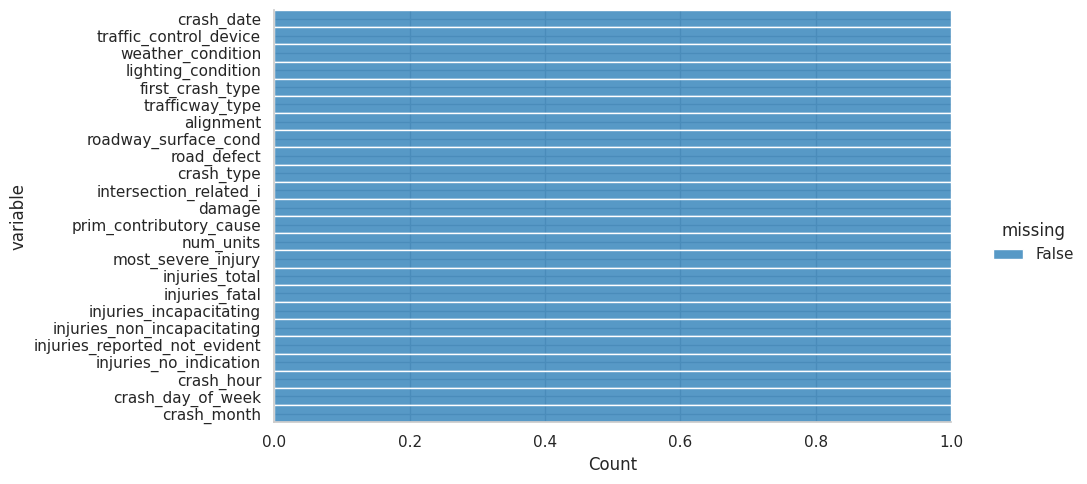

In [ ]:
sns.displot(data=plot_null_traffic_accidents,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

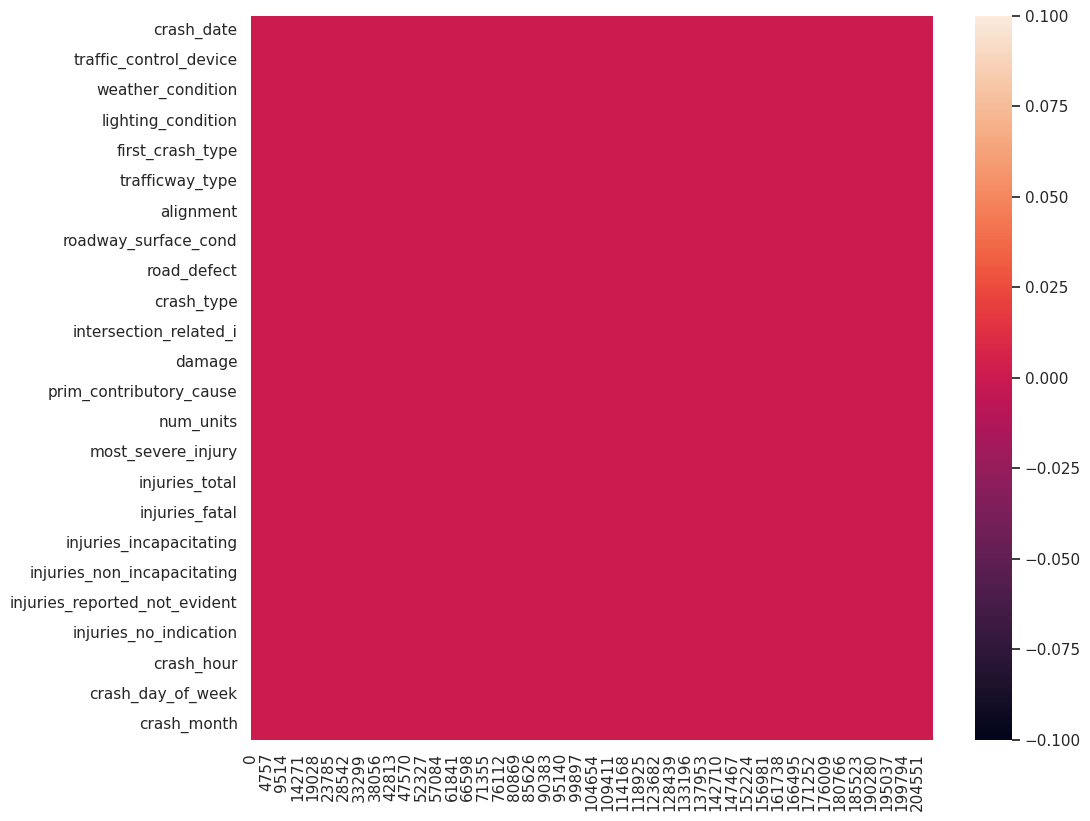

In [ ]:
(
    traffic_accidents_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿ CUANTOS VALORES PERDERE SI ELIMINO LOS NULOS?

In [ ]:
traffic_accidents_df.shape[0]

209306

In [ ]:
traffic_accidents_df.dropna().shape[0]

209306

In [ ]:
int(traffic_accidents_df.shape[0]) - int(traffic_accidents_df.dropna().shape[0])

0

## ELIMINAMOS LOS VALORES NULOS

In [ ]:
traffic_accidents_df.dropna(inplace=True)
traffic_accidents_df.isnull().sum().sum()


0

## 2 FILTRADO DE DATOS PARA UN MEJOR ANALISIS

In [ ]:
traffic_accidents_df.head(10)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
5,09/06/2023 12:59:00 AM,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,0.0,0,4,9
6,12/20/2022 11:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,3,12
7,09/20/2023 02:38:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,14,4,9
8,06/04/2018 06:42:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,18,2,6
9,09/07/2023 05:30:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,17,5,9


In [ ]:
traffic_accidents_df.dtypes

,0
crash_date,object
traffic_control_device,object
weather_condition,object
lighting_condition,object
first_crash_type,object
trafficway_type,object
alignment,object
roadway_surface_cond,object
road_defect,object
crash_type,object


In [ ]:
traffic_accidents_df.weather_condition.value_counts()

,count
weather_condition,
CLEAR,164700
RAIN,21703
CLOUDY/OVERCAST,7533
SNOW,6871
UNKNOWN,6534
OTHER,627
FREEZING RAIN/DRIZZLE,510
FOG/SMOKE/HAZE,360
SLEET/HAIL,308


In [ ]:
traffic_accidents_processed_df = traffic_accidents_df.drop(columns=['crash_date','most_severe_injury','lighting_condition','first_crash_type','trafficway_type','alignment','roadway_surface_cond','prim_contributory_cause','intersection_related_i','traffic_control_device']).copy()
traffic_accidents_processed_df.dtypes

,0
weather_condition,object
road_defect,object
crash_type,object
damage,object
num_units,int64
injuries_total,float64
injuries_fatal,float64
injuries_incapacitating,float64
injuries_non_incapacitating,float64
injuries_reported_not_evident,float64


## 3 CORRELACIONES

# 3.1 CORRELACIÓN DE VARIABLES NÚMERICAS

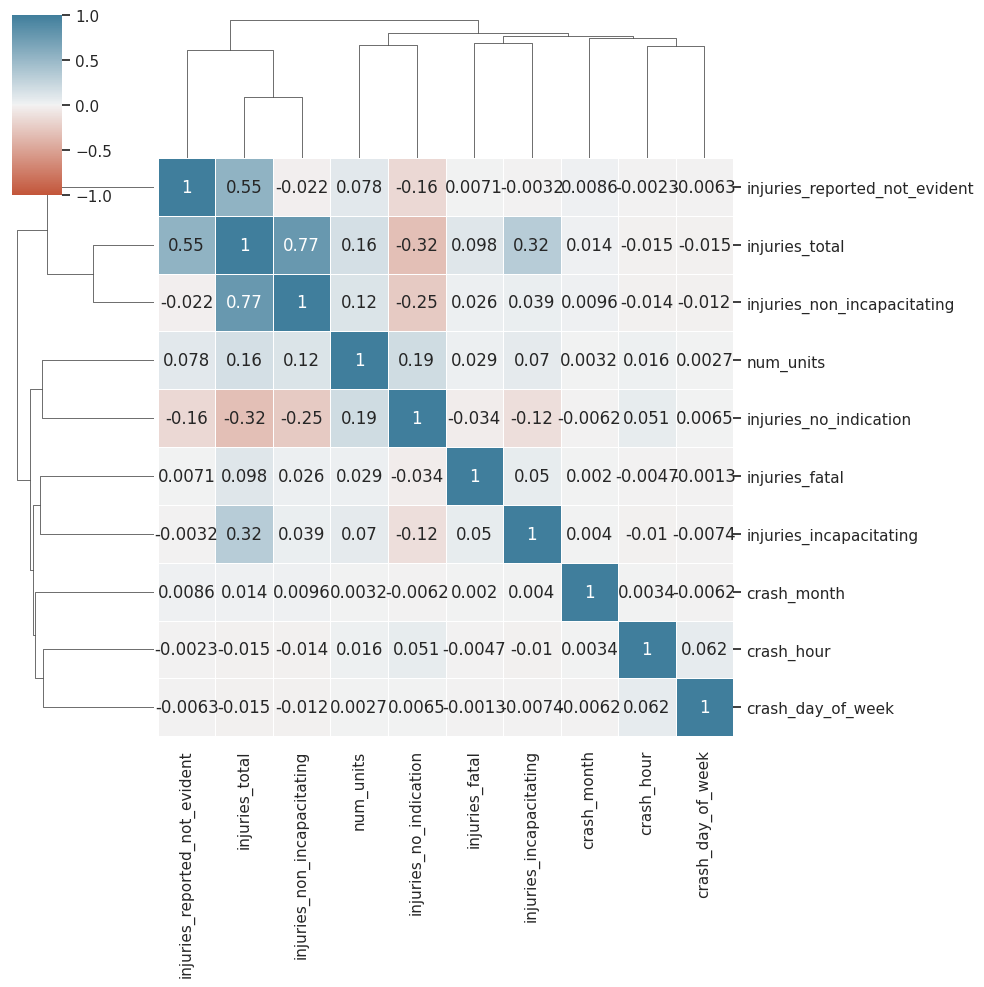

In [ ]:
sns.clustermap(
    data=traffic_accidents_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)


## 3.2 CORRELACIÓN CON VARIABLES CATEGORICAS

In [ ]:
print(traffic_accidents_processed_df['weather_condition'].unique())
print(traffic_accidents_processed_df['road_defect'].unique())
print(traffic_accidents_processed_df['crash_type'].unique())
print(traffic_accidents_processed_df['damage'].unique())


['CLEAR' 'RAIN' 'SNOW' 'CLOUDY/OVERCAST' 'UNKNOWN' 'FOG/SMOKE/HAZE'
 'BLOWING SNOW' 'FREEZING RAIN/DRIZZLE' 'OTHER' 'SLEET/HAIL'
 'SEVERE CROSS WIND GATE' 'BLOWING SAND, SOIL, DIRT']
['UNKNOWN' 'NO DEFECTS' 'OTHER' 'SHOULDER DEFECT' 'WORN SURFACE'
 'DEBRIS ON ROADWAY' 'RUT, HOLES']
['NO INJURY / DRIVE AWAY' 'INJURY AND / OR TOW DUE TO CRASH']
['$501 - $1,500' 'OVER $1,500' '$500 OR LESS']


In [ ]:
traffic_accidents_processed_df = (
    traffic_accidents_processed_df
    .assign(
        numeric_weather_condition=lambda df: df['weather_condition'].replace(
            traffic_accidents_processed_df['weather_condition'].unique(), range(len(traffic_accidents_processed_df['weather_condition'].unique()))
        ),
        numeric_road_defect=lambda df: df['road_defect'].replace(
            traffic_accidents_processed_df['road_defect'].unique(), range(len(traffic_accidents_processed_df['road_defect'].unique()))
        ),
        numeric_crash_type=lambda df: df['crash_type'].replace(
            traffic_accidents_processed_df['crash_type'].unique(), range(len(traffic_accidents_processed_df['crash_type'].unique()))
        ),
        numeric_damage=lambda df: df['damage'].replace(
            traffic_accidents_processed_df['damage'].unique(), range(len(traffic_accidents_processed_df['damage'].unique()))
        )
    )
)

traffic_accidents_processed_df



<ipython-input-26-625ccafa6382>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_weather_condition=lambda df: df['weather_condition'].replace(
<ipython-input-26-625ccafa6382>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_road_defect=lambda df: df['road_defect'].replace(
<ipython-input-26-625ccafa6382>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

,weather_condition,road_defect,crash_type,damage,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,numeric_weather_condition,numeric_road_defect,numeric_crash_type,numeric_damage
0,CLEAR,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",2,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7,0,0,0,0
1,CLEAR,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",2,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8,0,1,0,1
2,CLEAR,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",3,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12,0,1,0,0
3,CLEAR,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8,0,1,1,1
4,CLEAR,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",2,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",2,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9,4,0,0,1
209302,CLEAR,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",2,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7,0,1,0,1
209303,CLEAR,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,2,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10,0,1,1,2
209304,CLEAR,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,2,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6,0,1,1,2


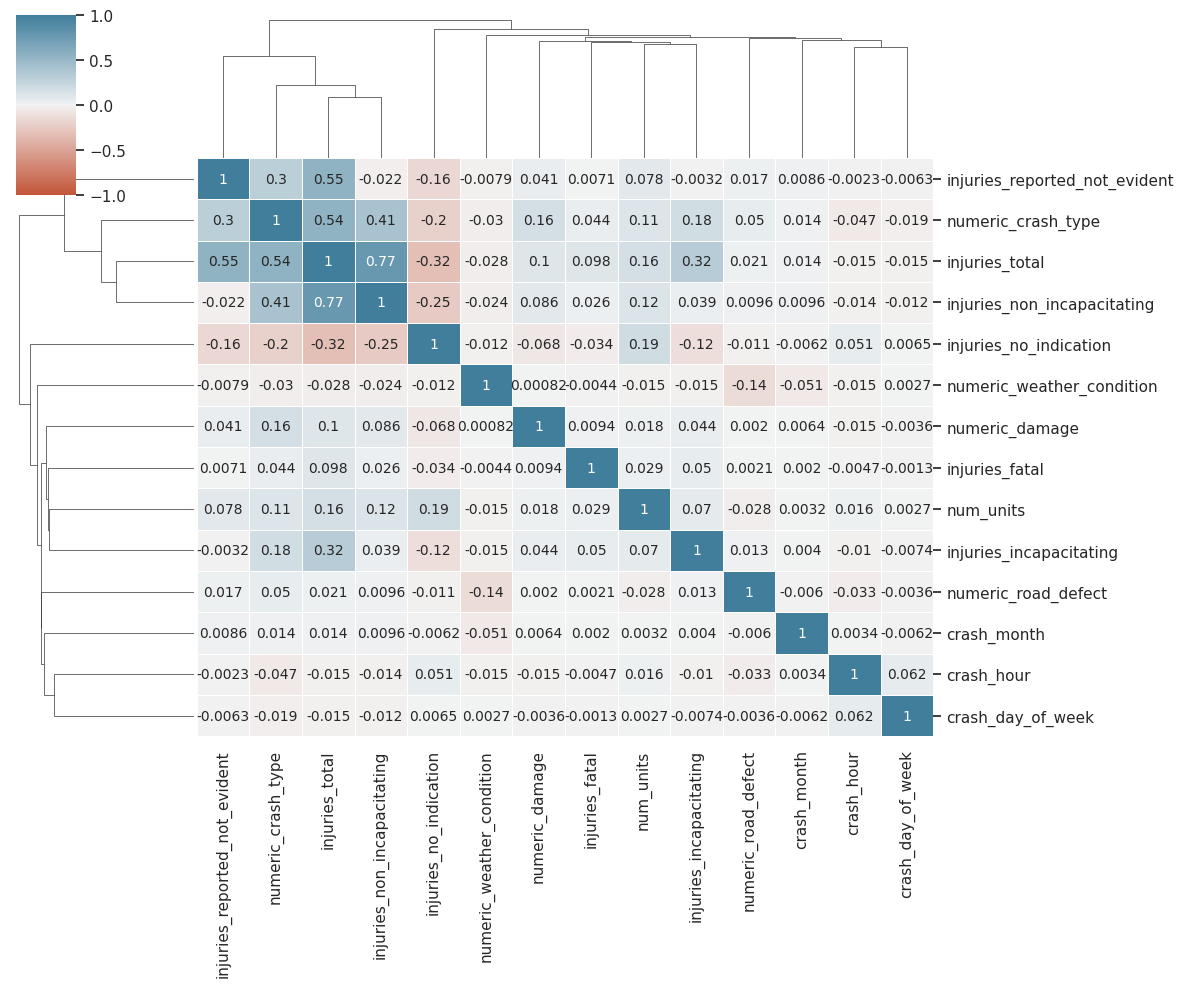

In [ ]:
sns.clustermap(
    data=traffic_accidents_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True,
    annot_kws={"size": 10},
    figsize=(12, 10)
)

## 4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

# 4.1 TENDENCIA CENTRAL

In [ ]:
traffic_accidents_processed_df.isnull().sum().sum()

0

In [ ]:
traffic_accidents_processed_df.mean(numeric_only=True)

,0
num_units,2.063300
injuries_total,0.382717
injuries_fatal,0.001859
injuries_incapacitating,0.038102
injuries_non_incapacitating,0.221241
injuries_reported_not_evident,0.121516
injuries_no_indication,2.244002
crash_hour,13.373047
crash_day_of_week,4.144024
crash_month,6.771822


In [ ]:
traffic_accidents_processed_df.median(numeric_only=True)

,0
num_units,2.0
injuries_total,0.0
injuries_fatal,0.0
injuries_incapacitating,0.0
injuries_non_incapacitating,0.0
injuries_reported_not_evident,0.0
injuries_no_indication,2.0
crash_hour,14.0
crash_day_of_week,4.0
crash_month,7.0


In [ ]:
traffic_accidents_processed_df.mode(numeric_only=True)

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,numeric_weather_condition,numeric_road_defect,numeric_crash_type,numeric_damage
0,2,0.0,0.0,0.0,0.0,0.0,2.0,17,6,10,0,1,0,1


# 4.2 DISPERSIÓN

In [ ]:
traffic_accidents_processed_df.min(numeric_only=True)

,0
num_units,1.0
injuries_total,0.0
injuries_fatal,0.0
injuries_incapacitating,0.0
injuries_non_incapacitating,0.0
injuries_reported_not_evident,0.0
injuries_no_indication,0.0
crash_hour,0.0
crash_day_of_week,1.0
crash_month,1.0


In [ ]:
traffic_accidents_processed_df.max(numeric_only=True)

,0
num_units,11.0
injuries_total,21.0
injuries_fatal,3.0
injuries_incapacitating,7.0
injuries_non_incapacitating,21.0
injuries_reported_not_evident,15.0
injuries_no_indication,49.0
crash_hour,23.0
crash_day_of_week,7.0
crash_month,12.0


In [ ]:
traffic_accidents_processed_df.std(numeric_only=True)

,0
num_units,0.396012
injuries_total,0.799720
injuries_fatal,0.047502
injuries_incapacitating,0.233964
injuries_non_incapacitating,0.614960
injuries_reported_not_evident,0.450865
injuries_no_indication,1.241175
crash_hour,5.603830
crash_day_of_week,1.966864
crash_month,3.427593


In [ ]:
(traffic_accidents_processed_df
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,num_units,2.0,2.0,2.0,0.0
1,injuries_total,0.0,0.0,1.0,1.0
2,injuries_fatal,0.0,0.0,0.0,0.0
3,injuries_incapacitating,0.0,0.0,0.0,0.0
4,injuries_non_incapacitating,0.0,0.0,0.0,0.0
5,injuries_reported_not_evident,0.0,0.0,0.0,0.0
6,injuries_no_indication,2.0,2.0,3.0,1.0
7,crash_hour,9.0,14.0,17.0,8.0
8,crash_day_of_week,2.0,4.0,6.0,4.0
9,crash_month,4.0,7.0,10.0,6.0


# 4.3 GRAFICA DE MEDIDAS CENTRALES Y DIPSERSIÓN DE LA VARIABLE video_duration_sec

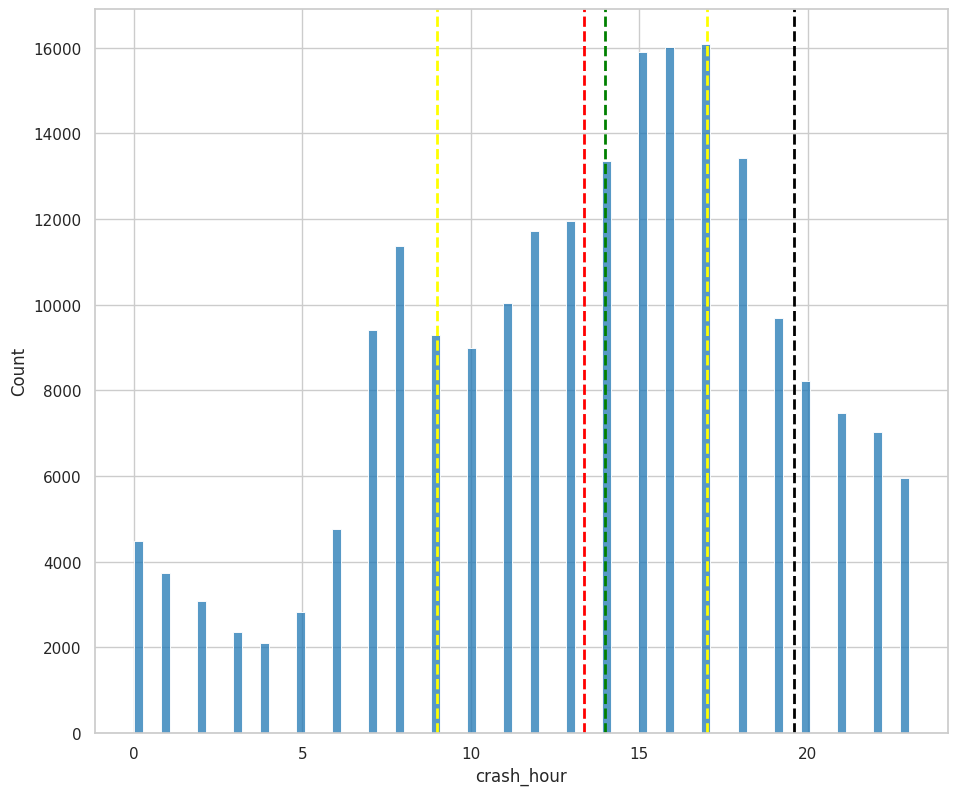

In [ ]:

df = traffic_accidents_processed_df
variable = 'crash_hour'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)


# 5 CONTEOS Y PROPORCIONES

In [ ]:
traffic_accidents_processed_df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,numeric_weather_condition,numeric_road_defect,numeric_crash_type,numeric_damage
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822,0.470273,0.877992,0.439213,0.902406
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593,1.161146,0.550384,0.496292,0.535407
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000,0.000000,1.000000,1.000000,1.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000,11.000000,6.000000,1.000000,2.000000


In [ ]:
traffic_accidents_processed_df.describe(include=object)

,weather_condition,road_defect,crash_type,damage
count,209306,209306,209306,209306
unique,12,7,2,3
top,CLEAR,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500"
freq,164700,171730,117376,147313


# 5.1 CONTEO DE CRASH TYPE

In [ ]:
crash_color = {
    'NO INJURY / DRIVE AWAY':'#ff6602ff',
    'INJURY AND / OR TOW DUE TO CRASH':'#0f7175ff'
}


<Axes: xlabel='crash_type'>

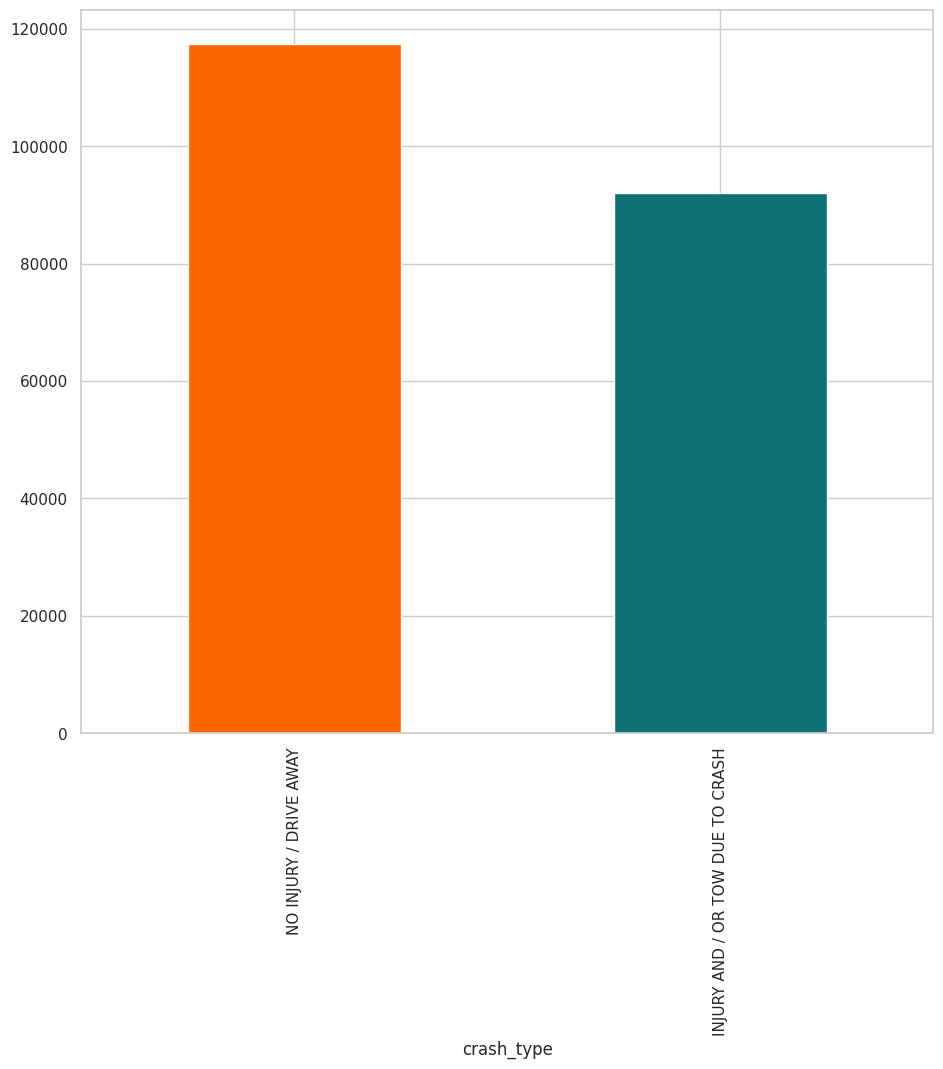

In [ ]:

(
    traffic_accidents_processed_df
    .crash_type
    .value_counts()
    .plot(
        kind='bar',
        color=crash_color.values()
    )
)

# 5.2 PROPORCIONES DE crash type

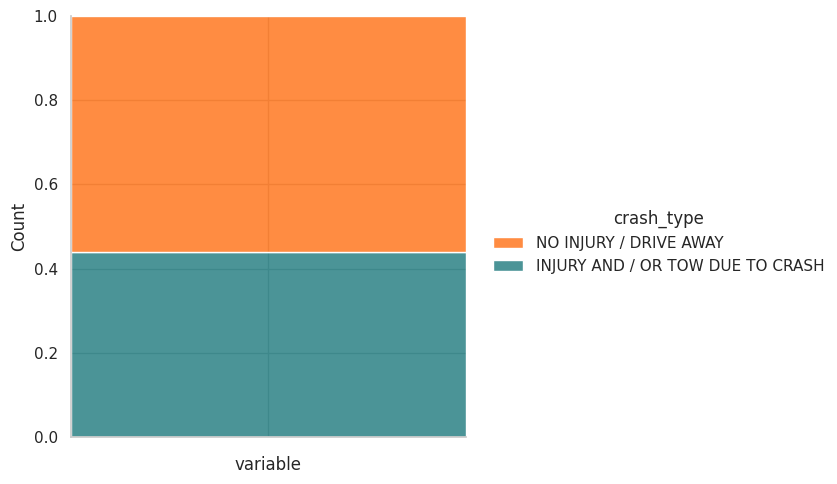

In [ ]:
traffic_accidents_processed_df['variable'] = ''
(
    traffic_accidents_processed_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='crash_type',
                multiple='fill',
                palette=crash_color
            )
        )
    )
)

## 6 ANALISIS BIVARIADO

<Axes: xlabel='injuries_total', ylabel='injuries_non_incapacitating'>

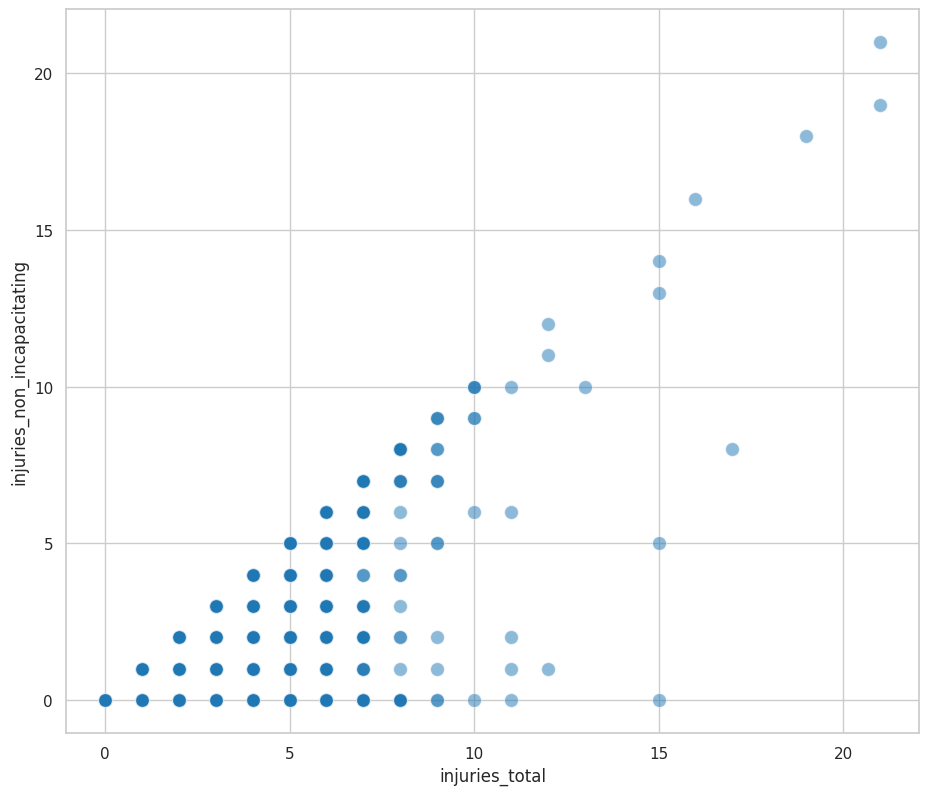

In [ ]:
sns.scatterplot(
    data=traffic_accidents_processed_df,
    x='injuries_total',
    y='injuries_non_incapacitating',
    alpha=1/2,
    s=100
)

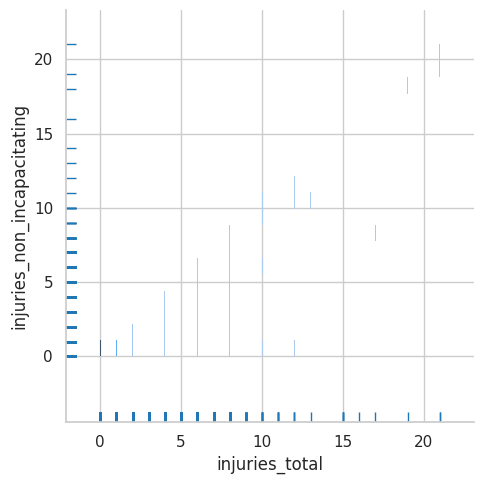

In [ ]:
sns.displot(
    data=traffic_accidents_processed_df,
    x='injuries_total',
    y='injuries_non_incapacitating',
    rug=True
)

# 6.1 RELACIÓN ENTRE CATEGORICOS Y NÚMERICOS

<Axes: xlabel='crash_type', ylabel='injuries_total'>

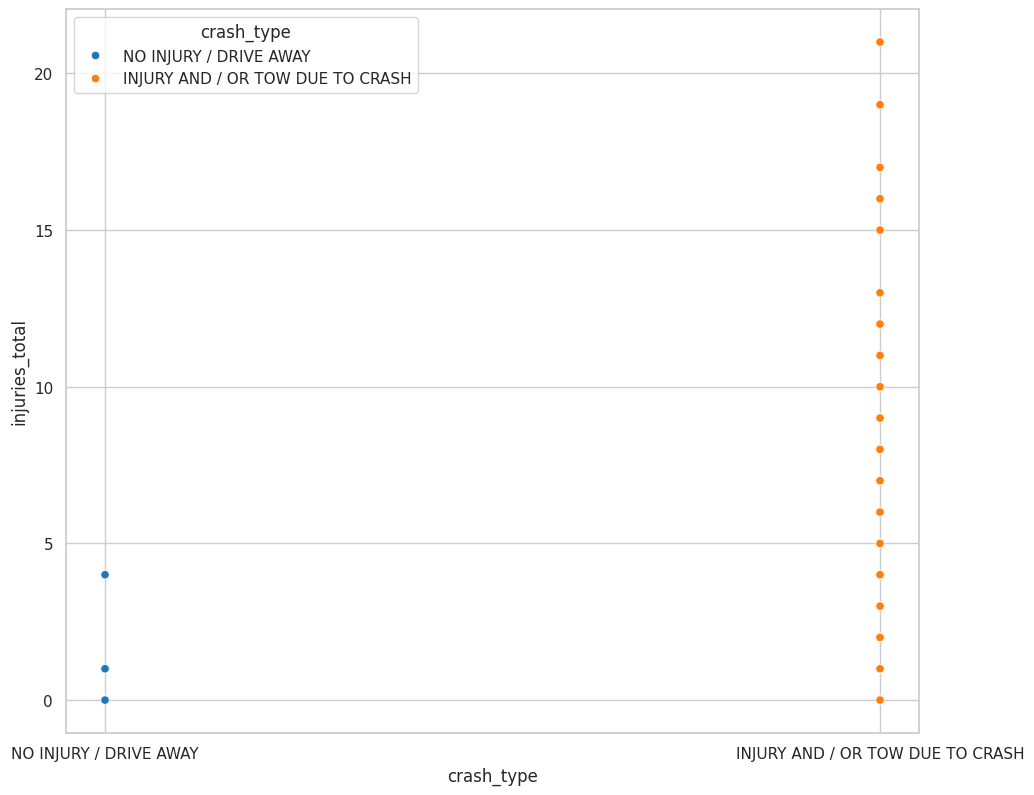

In [ ]:
sns.scatterplot(
    data=traffic_accidents_processed_df,
    x='crash_type',
    y='injuries_total',
    hue='crash_type'
)

<Axes: xlabel='crash_type', ylabel='injuries_total'>

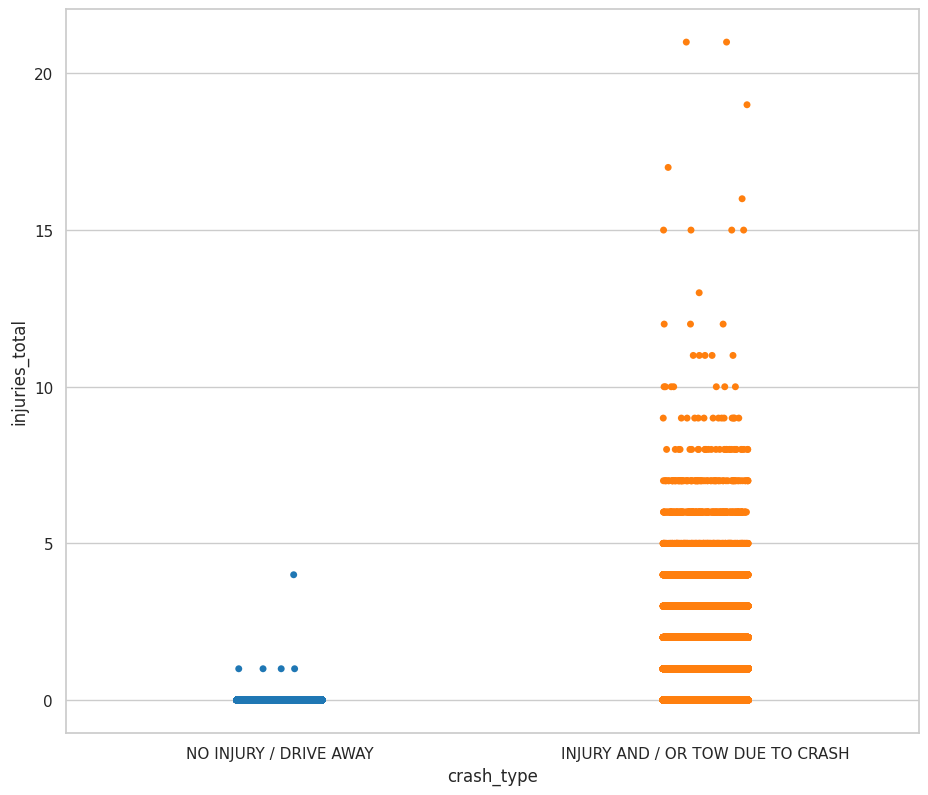

In [ ]:
sns.stripplot(
    data=traffic_accidents_processed_df,
    x='crash_type',
    y='injuries_total',
    hue='crash_type',
)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']


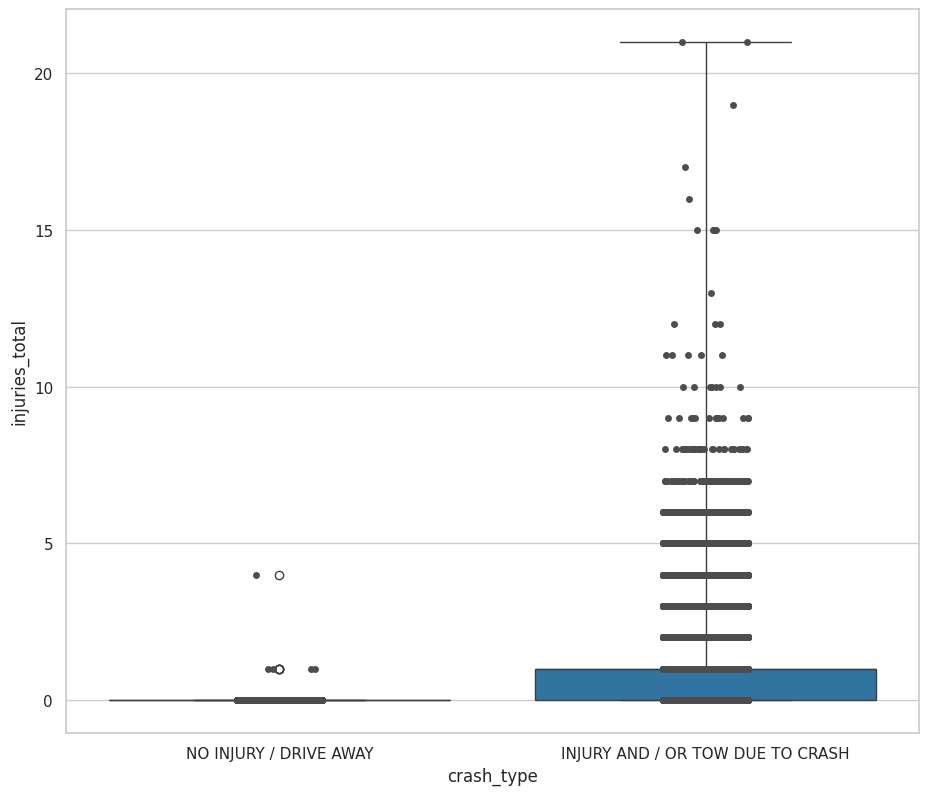

In [ ]:
ax = sns.boxplot(
    data=traffic_accidents_processed_df,
    x='crash_type',
    y='injuries_total',
    whis=np.inf
)

ax = sns.stripplot(
    data=traffic_accidents_processed_df,
    x='crash_type',
    y='injuries_total',
    color='.3'
)